In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

So I am bit confused here, we still have the environment, we are still getting actions for our action, how is this model free reinforcement learning. May be I will have to go through the slides again

In [2]:
env = BlackjackEnv()

In [10]:
def compute_discounted_reward(reward_list, discount_factor):
    discounted_rewards = list()
    for i, t in enumerate(reward_list[::-1]):
        if i == 0:
            discounted_rewards.append(t)
        else:
            reward = t + discount_factor * discounted_rewards[-1]
            discounted_rewards.append(reward)
    # return from time 1 to end, right now time 1 is the last element
    return discounted_rewards[::-1]

In [13]:
# test code for the compute_discounted_reward
reward_list = [1, 2, 3, 4, 5] # say we took 5 timesteps and at each time steps this is the reward we get
# then say if the discount factor is 1.0
discounted_return = np.cumsum(reward_list[::-1])
print("for discounted factor of 1 ==> {}".format(discounted_return[::-1]))

# for the discount factor of zero the reward should be its immediate reward
discounted_return = reward_list
print("for discount factor of 0 ==> {}".format(discounted_return))

# for the discount factor of 1
func_returned = compute_discounted_reward(reward_list, discount_factor=1.0)
print("function returned for the discout factor of 1 ==> {}".format(func_returned))
# now check if the function returns the same thing
func_returned = compute_discounted_reward(reward_list, discount_factor=0)
print("function returned for the discount factor of 0 ==> {}".format(func_returned))

for discounted factor of 1 ==> [15 14 12  9  5]
for discount factor of 0 ==> [1, 2, 3, 4, 5]
function returned for the discout factor of 1 ==> [15.0, 14.0, 12.0, 9.0, 5]
function returned for the discount factor of 0 ==> [1, 2, 3, 4, 5]


In [58]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    # roll out the policy
    for e in range(num_episodes):
        state = env.reset()
        reward_list = list()
        state_visited = list()
        visited = defaultdict(bool)
        # each policy also consists of a number of iterations, I am going till i obtain the result of the game
        for t in range(100):
            # sample the policy it will give you an action to take
            action = sample_policy(state)
            # execute this action to get the new state
            next_state, reward, done, _ = env.step(np.argmax(action))
            reward_list.append(reward)
            state_visited.append(next_state)
            if done:
                break
            state = next_state
            
        # end of an episode
        returns = compute_discounted_reward(reward_list, discount_factor)
        for i, state in enumerate(state_visited):
            returns_count[state] += 1
            returns_sum[state] += returns[i]
            visited[state] = True
            V[state] = returns_sum[state] / returns_count[state]
    return V

In [59]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return np.array([1.0, 0.0]) if score >= 20 else np.array([0.0, 1.0])

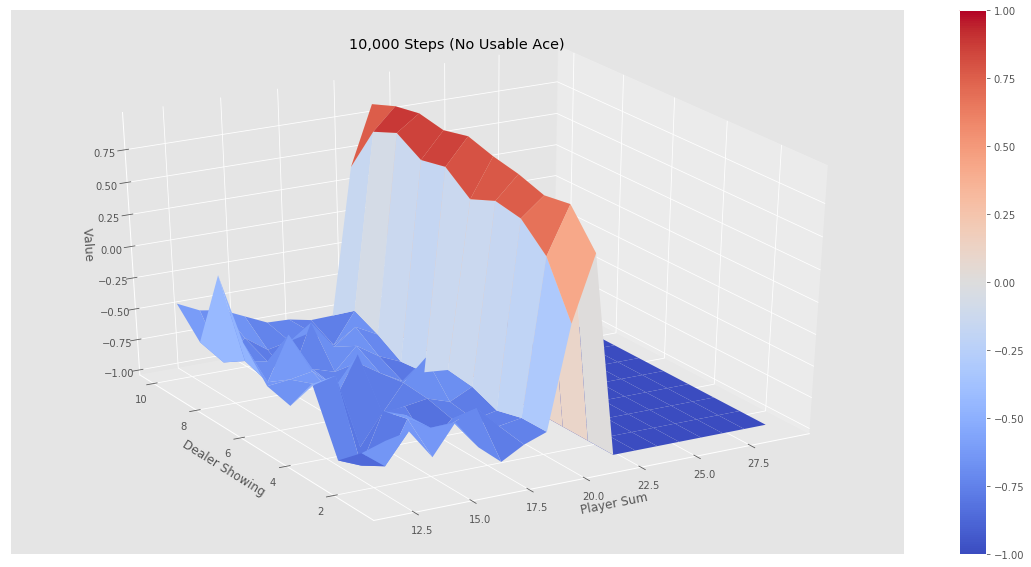

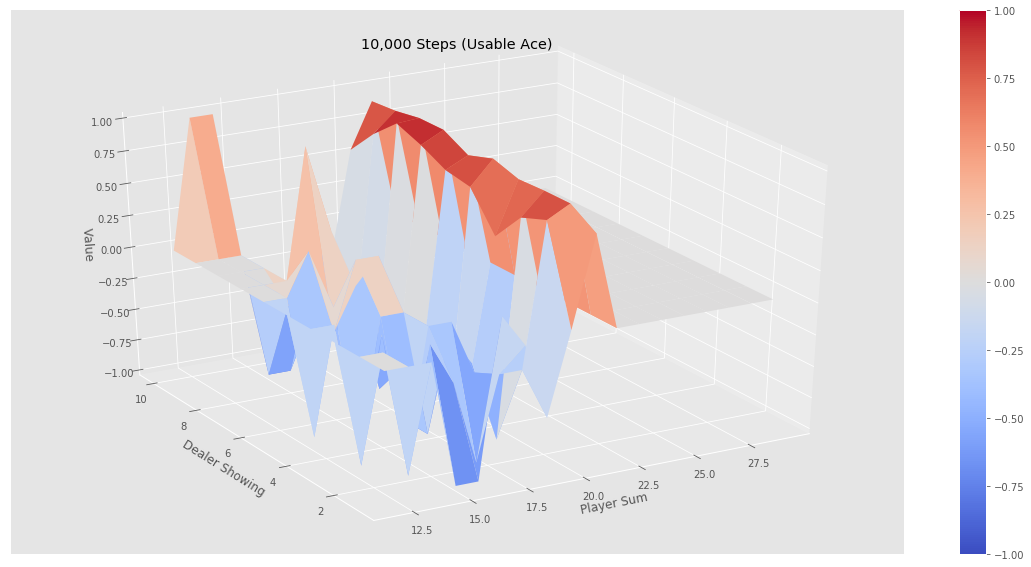

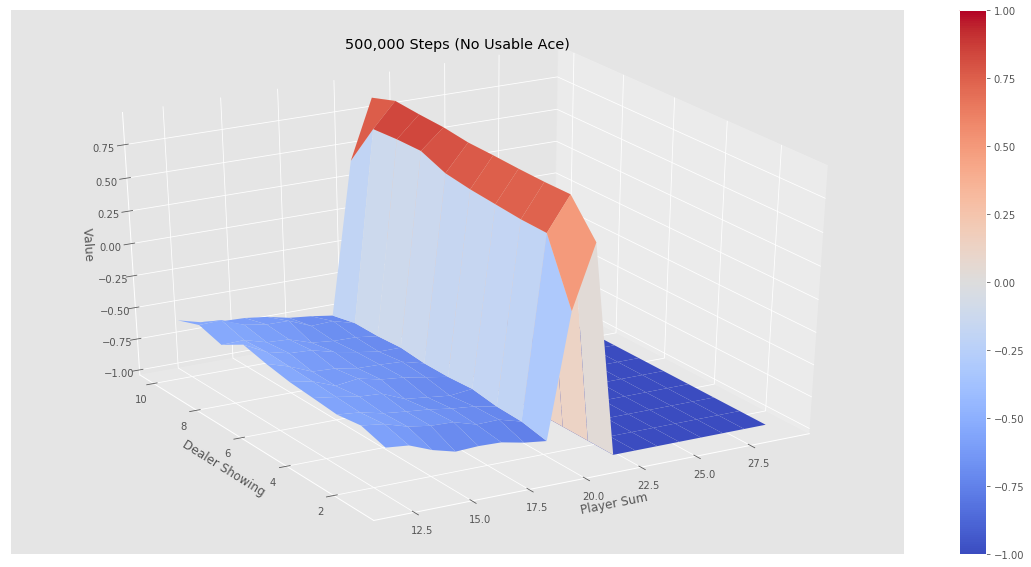

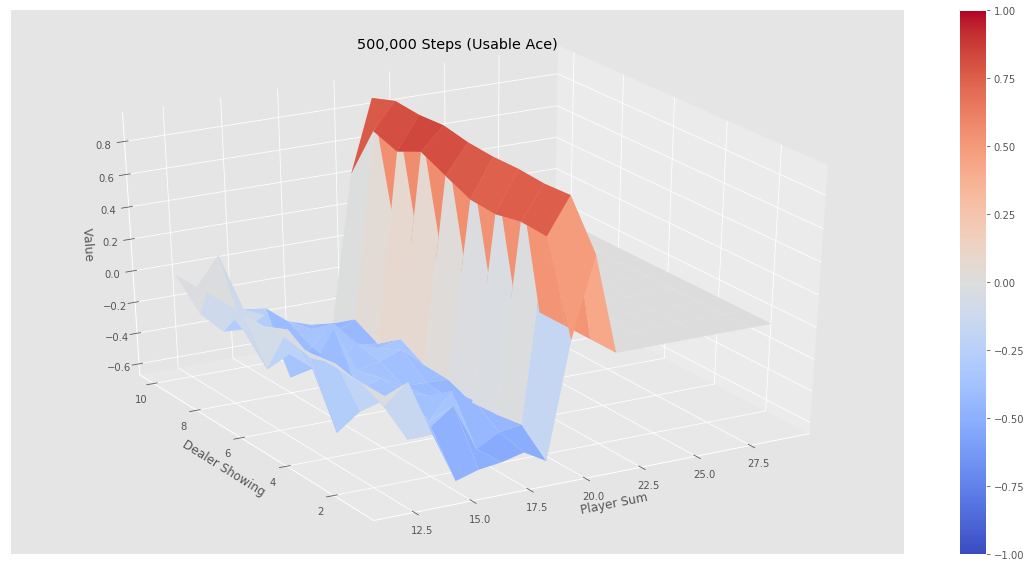

In [60]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")